## Exercise 11.1

The task at hand is to explore how the given linear regression obtained thorugh machine learning depends on three variables:
- The number of epochs $N_{epochs}$
- The number of datapoints used in the training $N_{train}$
- The noise $\sigma$


### **$N_{epochs}$**

First we look at the effect changing $N_{epochs}$ has on the model: to do so we run the regression with all the parameters staying the same other than $N_{epochs}$, which will take the values of 10, 30 and 100.





In [11]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [12]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [13]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
  
model10 = tf.keras.Sequential()
model10.add(Dense(1, input_shape=(1,)))

model30 = tf.keras.Sequential()
model30.add(Dense(1, input_shape=(1,)))

model100 = tf.keras.Sequential()
model100.add(Dense(1, input_shape=(1,)))


# compile the model choosing optimizer, loss and metrics objects
model10.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model30.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model100.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [14]:
# get a summary of our composed model
model10.summary()
model30.summary()
model100.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
____________________________

In [15]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history1 = model10.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=10,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history2 = model30.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history3 = model100.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/10
16/16 [==============================] - 0s 9ms/step - loss: 1.5631 - mse: 1.5631 - val_loss: 1.4687 - val_mse: 1.4687
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 1.1208 - mse: 1.1208 - val_loss: 1.0945 - val_mse: 1.0945
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.8547 - mse: 0.8547 - val_loss: 0.8524 - val_mse: 0.8524
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6837 - mse: 0.6837 - val_loss: 0.6921 - val_mse: 0.6921
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5697 - mse: 0.5697 - val_loss: 0.5829 - val_mse: 0.5829
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4924 - mse: 0.4924 - val_loss: 0.5064 - val_mse: 0.5064
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4367 - mse: 0.4367 - val_loss: 0.4490 - val_mse: 0.4490
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3942 - mse: 0.39

In [16]:
# return weights and biases
model10.get_weights()
model30.get_weights()
model100.get_weights()

[array([[2.0531466]], dtype=float32), array([0.94505084], dtype=float32)]

In [17]:
# evaluate model
score10 = model10.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score30 = model30.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score100 = model100.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('10 Epochs')
print('Test loss:', score10[0])
print('Test accuracy:', score10[1])

print()
print('30 Epochs')
print('Test loss:', score30[0])
print('Test accuracy:', score30[1])

print()
print('100 Epochs')
print('Test loss:', score100[0])
print('Test accuracy:', score100[1])

2/2 [==============================] - 0s 5ms/step - loss: 0.2795 - mse: 0.2795

10 Epochs
Test loss: 0.35400134325027466
Test accuracy: 0.35400140285491943

30 Epochs
Test loss: 0.27991601824760437
Test accuracy: 0.27991601824760437

100 Epochs
Test loss: 0.27947184443473816
Test accuracy: 0.27947184443473816


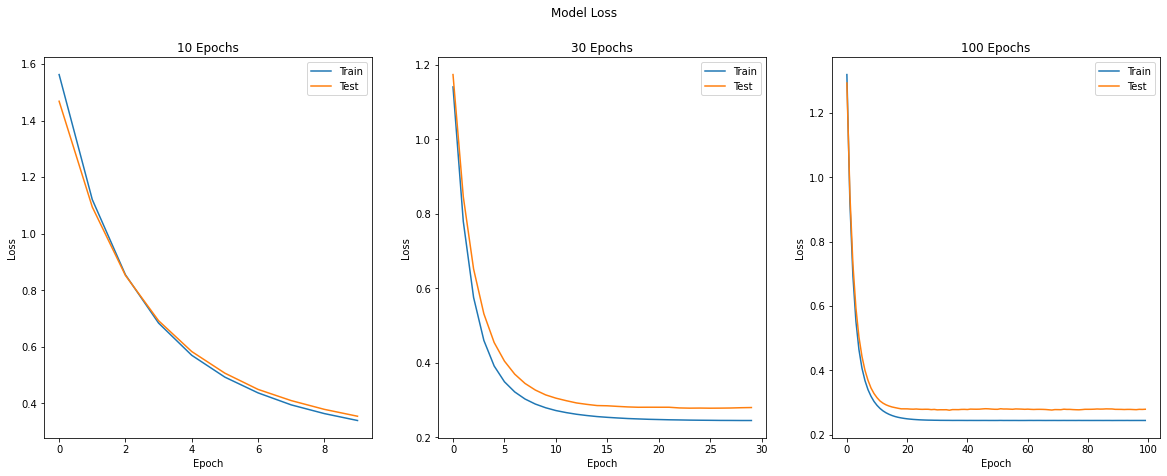

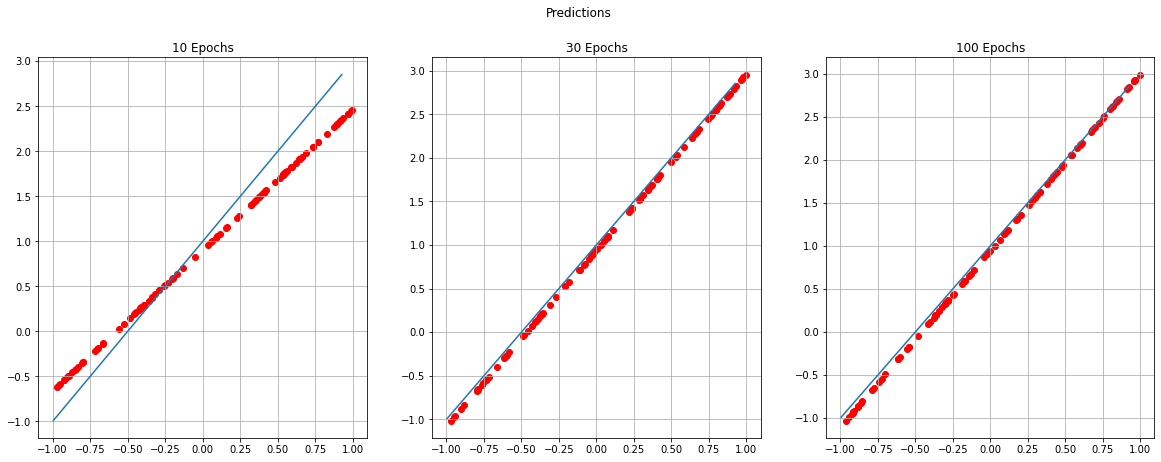

In [19]:
# look into training history
# Plot training & validation loss values

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,7))
fig.suptitle('Model Loss')
plt.subplot(131)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('10 Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(132)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('30 Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(133)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('100 Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

fig=plt.figure(figsize=(20,7))
fig.suptitle('Predictions')

plt.subplot(131)

plt.title('10 Epochs')
x_predicted10 = np.random.uniform(-1, 1, 100)
y_predicted10 = model10.predict(x_predicted10)
plt.scatter(x_predicted10, y_predicted10,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.subplot(132)

plt.title('30 Epochs')
x_predicted30 = np.random.uniform(-1, 1, 100)
y_predicted30 = model30.predict(x_predicted30)
plt.scatter(x_predicted30, y_predicted30,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.subplot(133)

plt.title('100 Epochs')
x_predicted100 = np.random.uniform(-1, 1, 100)
y_predicted100 = model100.predict(x_predicted100)
plt.scatter(x_predicted100, y_predicted100,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.show()

As it was expected, with only 10 epochs the model is underfitted, so the linear regression differs significantly from the "real" line and the loss of the test is higher. Once the number of epochs is enough to properly fit the data there isn't much difference between 30 and 100 epochs, as both the graphs and the loss of the test are similar between the two.

### **$N_{train}$**

Since we have ascertained that 30 epochs are enough for the situation, we will test how changing $N_{train}$ affects the linear regression keeping the number of epochs constant.

The values of $N_{train}$ that will be tested are 100, 500, 1000 and 2500

In [20]:
# generate training inputs
np.random.seed(0)
x_train1 = np.random.uniform(-1, 1, 100)
x_train2 = np.random.uniform(-1, 1, 500)
x_train3 = np.random.uniform(-1, 1, 1000)
x_train4 = np.random.uniform(-1, 1, 2500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train1 = np.random.normal(m * x_train1 + b, sigma) # actual measures from which we want to guess regression parameters
y_train2 = np.random.normal(m * x_train2 + b, sigma)
y_train3 = np.random.normal(m * x_train3 + b, sigma)
y_train4 = np.random.normal(m * x_train4 + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)

In [21]:
model1 = tf.keras.Sequential()
model2 = tf.keras.Sequential()
model3 = tf.keras.Sequential()
model4 = tf.keras.Sequential()

model1.add(Dense(1, input_shape=(1,)))
model2.add(Dense(1, input_shape=(1,)))
model3.add(Dense(1, input_shape=(1,)))
model4.add(Dense(1, input_shape=(1,)))

model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])


history1 = model1.fit(x=x_train1, y=y_train1, 
          batch_size=32, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid))
history2 = model2.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid))
history3 = model3.fit(x=x_train3, y=y_train3, 
          batch_size=32, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid))
history4 = model4.fit(x=x_train4, y=y_train4, 
          batch_size=32, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid))

# evaluate model
score1 = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score2 = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score3 = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score4 = model4.evaluate(x_valid, y_valid, batch_size=32, verbose=0)


print()
print('100 Training Points')
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

print()
print('500 Training Points')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

print()
print('1000 Training Points')
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

print()
print('2500 Training Points')
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Epoch 1/30
4/4 [==============================] - 0s 42ms/step - loss: 1.4356 - mse: 1.4356 - val_loss: 1.5160 - val_mse: 1.5160
Epoch 2/30
4/4 [==============================] - 0s 8ms/step - loss: 1.3105 - mse: 1.3105 - val_loss: 1.3723 - val_mse: 1.3723
Epoch 3/30
4/4 [==============================] - 0s 11ms/step - loss: 1.1896 - mse: 1.1896 - val_loss: 1.2272 - val_mse: 1.2272
Epoch 4/30
4/4 [==============================] - 0s 10ms/step - loss: 1.0710 - mse: 1.0710 - val_loss: 1.1349 - val_mse: 1.1349
Epoch 5/30
4/4 [==============================] - 0s 10ms/step - loss: 0.9948 - mse: 0.9948 - val_loss: 1.0556 - val_mse: 1.0556
Epoch 6/30
4/4 [==============================] - 0s 10ms/step - loss: 0.9282 - mse: 0.9282 - val_loss: 0.9507 - val_mse: 0.9507
Epoch 7/30
4/4 [==============================] - 0s 10ms/step - loss: 0.8429 - mse: 0.8429 - val_loss: 0.8777 - val_mse: 0.8777
Epoch 8/30
4/4 [==============================] - 0s 11ms/step - loss: 0.7847 - mse: 0.7847 - val_

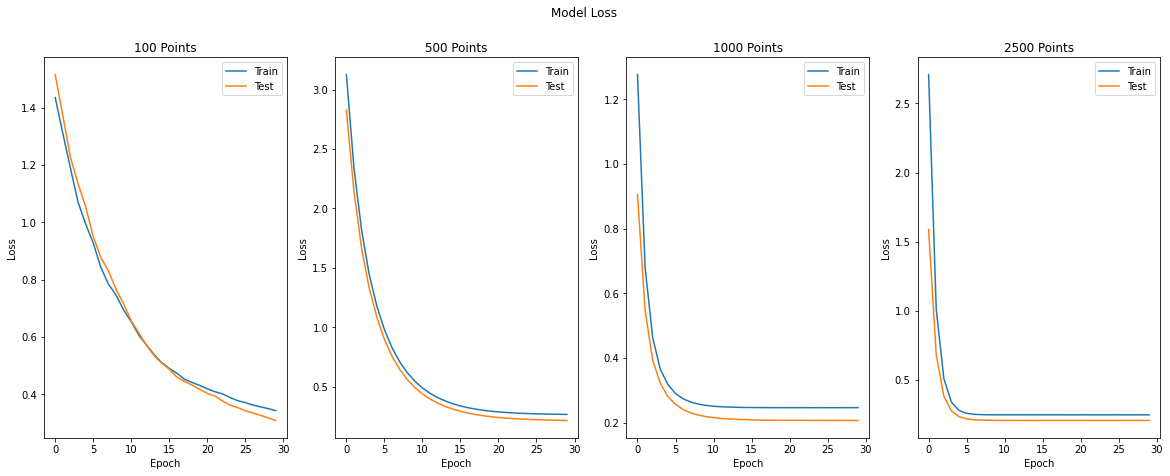

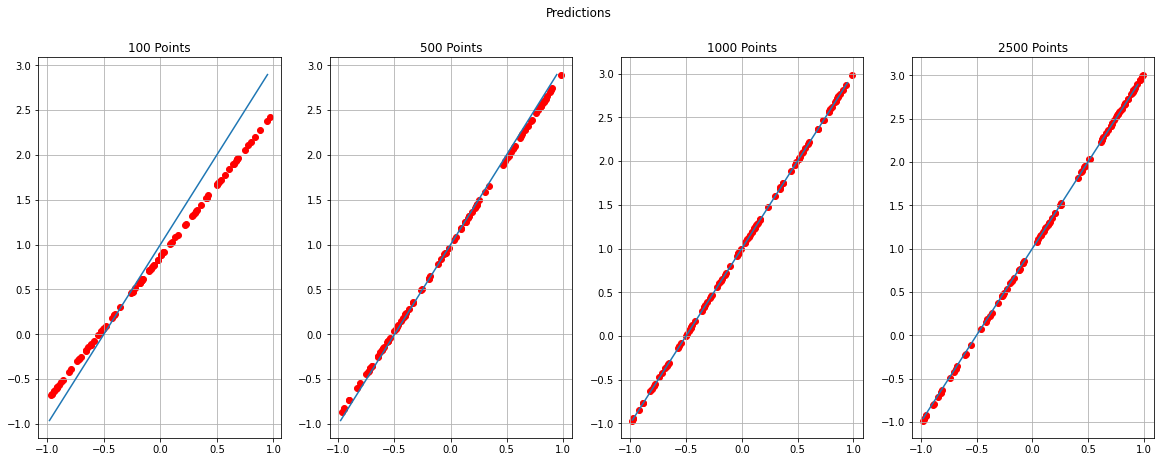

In [22]:
# look into training history
# Plot training & validation loss values

fig=plt.figure(figsize=(20,7))

fig.suptitle('Model Loss')

plt.subplot(141)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('100 Points')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(142)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('500 Points')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(143)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('1000 Points')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(144)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('2500 Points')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')


fig=plt.figure(figsize=(20,7))
fig.suptitle('Predictions')

plt.subplot(141)

plt.title('100 Points')
x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.subplot(142)

plt.title('500 Points')
x_predicted2 = np.random.uniform(-1, 1, 100)
y_predicted2 = model2.predict(x_predicted2)
plt.scatter(x_predicted2, y_predicted2,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.subplot(143)

plt.title('1000 Points')
x_predicted3 = np.random.uniform(-1, 1, 100)
y_predicted3 = model3.predict(x_predicted3)
plt.scatter(x_predicted3, y_predicted3,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.subplot(144)

plt.title('2500 Points')
x_predicted4 = np.random.uniform(-1, 1, 100)
y_predicted4 = model4.predict(x_predicted4)
plt.scatter(x_predicted4, y_predicted4,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.show()

The case with $N_{train}$ = 100 is clearly underfitted, and the linear regression proposed by that model is erroneous. In the other three cases the model works: 2500 points seem an overkill as the gain in precision is minimal; 1000 points is slightly more accurate than with 500 points, so among them the choice depends more on what one needs the model to do: be extremely precise or quickly trained. Going forward 500 points will be used as the difference is minimal and the effect of the noise $\sigma$ on the regression will far outweigh those of having fewer data points for the training

### **Noise $\sigma$**

The last one of the three parameters we set out to check on is the noise $\sigma$. So far it has been kept costant at 0.5, and now we will see how it affects the model using the values 0.1, 0.5 and 2


In [23]:
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma1 = 0.1
y_train1 = np.random.normal(m * x_train + b, sigma1) 
y_valid1 = np.random.normal(m * x_valid + b, sigma1)

sigma2 = 0.5
y_train2 = np.random.normal(m * x_train + b, sigma2) 
y_valid2 = np.random.normal(m * x_valid + b, sigma2)

sigma3 = 2.0
y_train3 = np.random.normal(m * x_train + b, sigma3) 
y_valid3 = np.random.normal(m * x_valid + b, sigma3)

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))

model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))

model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))

model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history1 = model1.fit(x=x_train, y=y_train1, 
          batch_size=32, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid1))
history2 = model2.fit(x=x_train, y=y_train2, 
          batch_size=32, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid2))
history3 = model3.fit(x=x_train, y=y_train3, 
          batch_size=32, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid3))



Epoch 1/30
16/16 [==============================] - 0s 9ms/step - loss: 1.4789 - mse: 1.4789 - val_loss: 0.7794 - val_mse: 0.7794
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.9762 - mse: 0.9762 - val_loss: 0.5371 - val_mse: 0.5371
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6760 - mse: 0.6760 - val_loss: 0.3916 - val_mse: 0.3916
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4867 - mse: 0.4867 - val_loss: 0.2999 - val_mse: 0.2999
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3638 - mse: 0.3638 - val_loss: 0.2368 - val_mse: 0.2368
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2792 - mse: 0.2792 - val_loss: 0.1903 - val_mse: 0.1903
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2176 - mse: 0.2176 - val_loss: 0.1552 - val_mse: 0.1552
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1726 - mse: 0.17

In [26]:
score1 = model1.evaluate(x_valid, y_valid1, batch_size=32, verbose=0)
score2 = model2.evaluate(x_valid, y_valid2, batch_size=32, verbose=0)
score3 = model3.evaluate(x_valid, y_valid3, batch_size=32, verbose=0)

# print performance
print()
print('Sigma 0.1')
print('Test loss:', score10[0])
print('Test accuracy:', score10[1])

print()
print('Sigma 0.5')
print('Test loss:', score30[0])
print('Test accuracy:', score30[1])

print()
print('Sigma 2.0')
print('Test loss:', score100[0])
print('Test accuracy:', score100[1])


Sigma 0.1
Test loss: 0.35400134325027466
Test accuracy: 0.35400140285491943

Sigma 0.5
Test loss: 0.27991601824760437
Test accuracy: 0.27991601824760437

Sigma 2.0
Test loss: 0.27947184443473816
Test accuracy: 0.27947184443473816


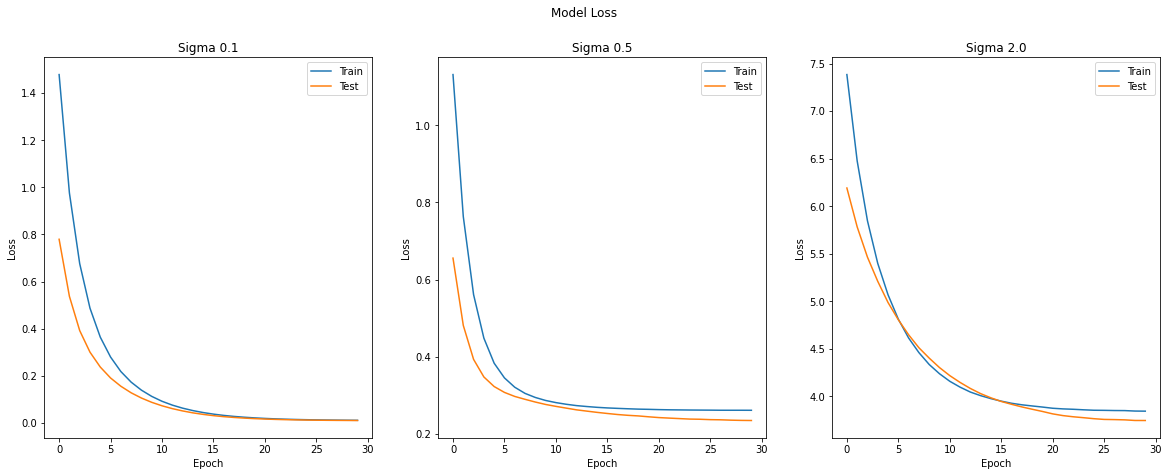

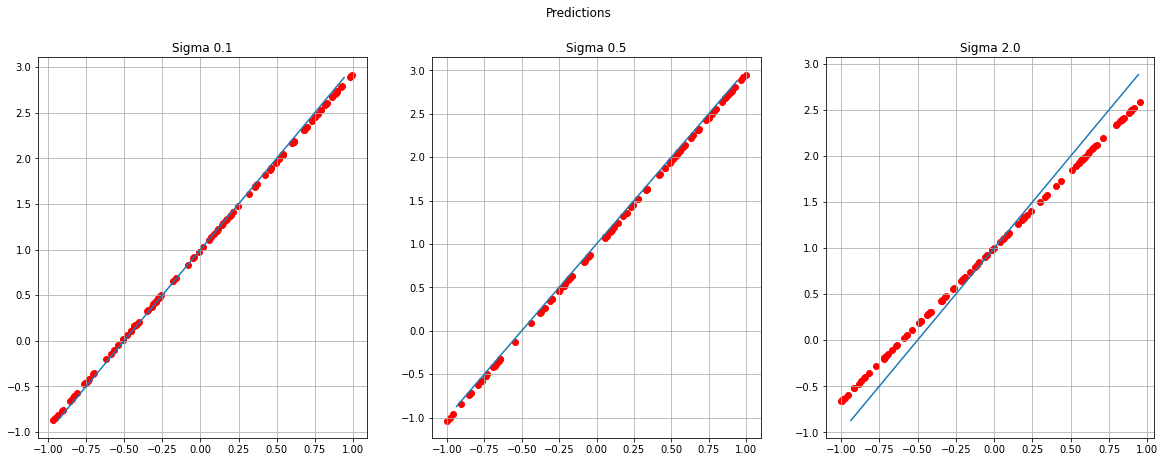

In [27]:
fig=plt.figure(figsize=(20,7))
fig.suptitle('Model Loss')
plt.subplot(131)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Sigma 0.1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(132)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Sigma 0.5')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(133)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Sigma 2.0')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

fig=plt.figure(figsize=(20,7))
fig.suptitle('Predictions')

plt.subplot(131)

plt.title('Sigma 0.1')
x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.subplot(132)

plt.title('Sigma 0.5')
x_predicted2 = np.random.uniform(-1, 1, 100)
y_predicted2 = model2.predict(x_predicted2)
plt.scatter(x_predicted2, y_predicted2,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.subplot(133)

plt.title('Sigma 2.0')
x_predicted3 = np.random.uniform(-1, 1, 100)
y_predicted3 = model3.predict(x_predicted3)
plt.scatter(x_predicted3, y_predicted3,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.show()

The effect of noise on the model is very evident in the case of $\sigma$ = 2.0, were the prediction significantly differs from the expected result. In the other two cases the model is good, and counterintuitively the linear regression obtained with $\sigma$  = 0.5 seems better than the one with less noise ($\sigma$ = 0.1).

## Exercise 11.2

Now we have to make a model in order t fit

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

The following parameters will be changed to see how they affect the model:
- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function

### Number of layers and Number of neurons in each layer

5 combinations will be tested:
- 2 Layers with 200 neurons on input 
- 3 Layers with a pyramdial shape (Large -> Medium -> Thin(Output))
- 4 Layers with an accordion shape (Large -> Medium -> Large->Output)
- 5 Layers with a triangular shape (Thin -> Medium -> Large -> Medium -> Output)
- 10 Layers of the same size (5 each)


In [28]:
# target parameters of f(x) = a + b*x + c*x**2 + d*x**3
a = 4 # coeff of x**0
b = -3 # coeff of x**1
c = -2 # coeff of x**2
d = 3 # coeff of x**3

In [29]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a + b * x_valid + c * x_valid**2 + d * x_valid**3
sigma = 0.5
y_train = np.random.normal(a + b * x_train + c * x_train**2 + d * x_train**3 , sigma)
y_valid = np.random.normal(a + b * x_valid + c * x_valid**2 + d * x_valid**3, sigma)

In [30]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model1 = tf.keras.Sequential()
model1.add(Dense(200, input_shape=(1,), activation='selu'))
model1.add(Dense(1,))

model2 = tf.keras.Sequential()
model2.add(Dense(50, input_shape=(1,), activation='selu'))
model2.add(Dense(10, input_shape=(1,), activation='selu'))
model2.add(Dense(1,))

model3 = tf.keras.Sequential()
model3.add(Dense(45, input_shape=(1,), activation='selu'))
model3.add(Dense(20, input_shape=(1,), activation='selu'))
model3.add(Dense(45, input_shape=(1,), activation='selu'))
model3.add(Dense(1,))

model4 = tf.keras.Sequential()
model4.add(Dense(5, input_shape=(1,), activation='selu'))
model4.add(Dense(20, input_shape=(1,), activation='selu'))
model4.add(Dense(45, input_shape=(1,), activation='selu'))
model4.add(Dense(20, input_shape=(1,), activation='selu'))
model4.add(Dense(1,))

model5 = tf.keras.Sequential()
model5.add(Dense(3, input_shape=(1,), activation='selu'))
model5.add(Dense(3, input_shape=(1,), activation='selu'))
model5.add(Dense(3, input_shape=(1,), activation='selu'))
model5.add(Dense(3, input_shape=(1,), activation='selu'))
model5.add(Dense(3, input_shape=(1,), activation='selu'))
model5.add(Dense(3, input_shape=(1,), activation='selu'))
model5.add(Dense(3, input_shape=(1,), activation='selu'))
model5.add(Dense(3, input_shape=(1,), activation='selu'))
model5.add(Dense(3, input_shape=(1,), activation='selu'))
model5.add(Dense(1,))


# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model5.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history1 = model1.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history2 = model2.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history3 = model3.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history4 = model4.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history5 = model5.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 0s 5ms/step - loss: 2.8027 - mse: 2.8027 - val_loss: 0.8931 - val_mse: 0.8931
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.8044 - mse: 0.8044 - val_loss: 0.9396 - val_mse: 0.9396
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.7844 - mse: 0.7844 - val_loss: 0.9619 - val_mse: 0.9619
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.7755 - mse: 0.7755 - val_loss: 0.9778 - val_mse: 0.9778
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.7686 - mse: 0.7686 - val_loss: 0.9146 - val_mse: 0.9146
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.7552 - mse: 0.7552 - val_loss: 0.9239 - val_mse: 0.9239
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.7458 - mse: 0.7458 - val_loss: 0.9106 - val_mse: 0.9106
Epoch 8/30
32/32 [==============================] - 0s 3ms/step - loss: 0.7378 - mse: 0.73

In [31]:
score = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Model #1')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model2.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Model #2')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model3.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Model #3')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model4.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Model #4')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model5.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Model #5')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model #1
Test loss: 0.5300210118293762
Test accuracy: 0.5300210118293762
Model #2
Test loss: 0.04078403115272522
Test accuracy: 0.04078403115272522
Model #3
Test loss: 0.05240163207054138
Test accuracy: 0.05240163207054138
Model #4
Test loss: 0.06981351971626282
Test accuracy: 0.06981351971626282
Model #5
Test loss: 0.03281896561384201
Test accuracy: 0.03281896561384201


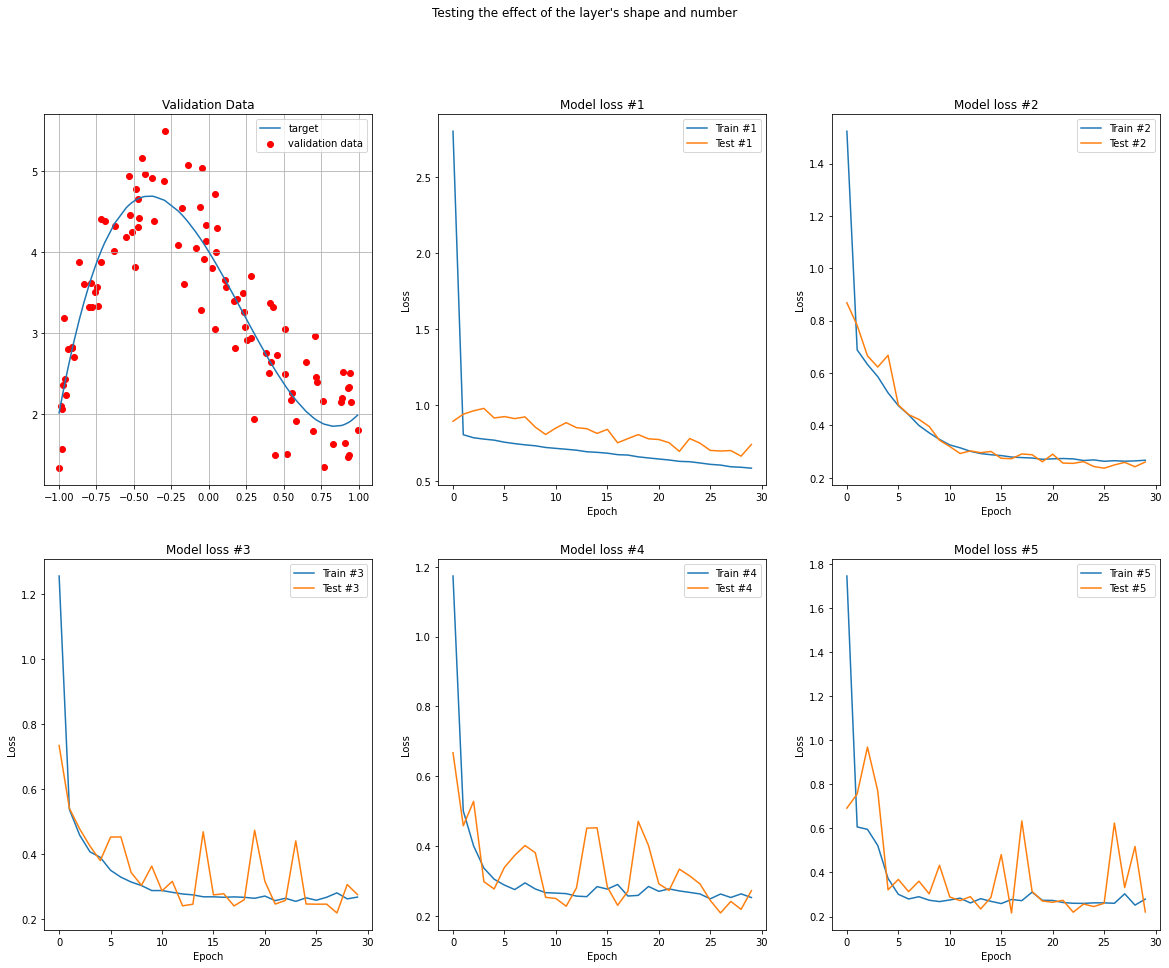

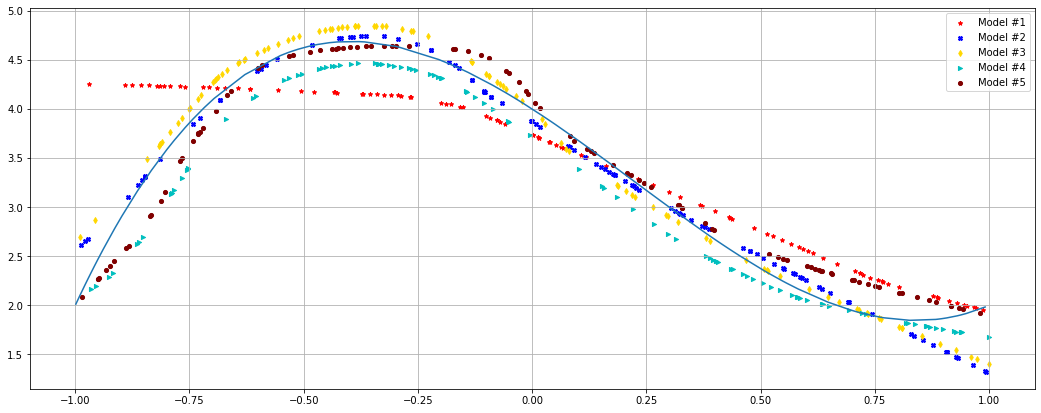

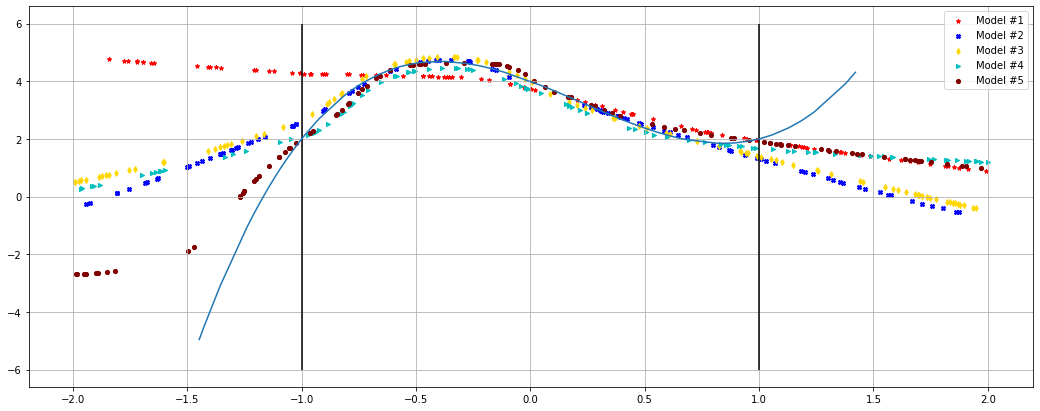

In [32]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,15))
fig.suptitle("Testing the effect of the layer's shape and number")

plt.subplot(231)

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.title('Validation Data')
plt.legend()
plt.grid(True)

plt.subplot(232)

plt.plot(history1.history['loss'], label = ('Train #1'))
plt.plot(history1.history['val_loss'], label = ('Test #1'))
plt.title('Model loss #1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(233)

plt.plot(history2.history['loss'], label = ('Train #2'))
plt.plot(history2.history['val_loss'], label = ('Test #2'))
plt.title('Model loss #2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(234)

plt.plot(history3.history['loss'], label = ('Train #3'))
plt.plot(history3.history['val_loss'], label = ('Test #3'))
plt.title('Model loss #3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')


plt.subplot(235)

plt.plot(history4.history['loss'], label = ('Train #4'))
plt.plot(history4.history['val_loss'], label = ('Test #4'))
plt.title('Model loss #4')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(236)

plt.plot(history5.history['loss'], label = ('Train #5'))
plt.plot(history5.history['val_loss'], label = ('Test #5'))
plt.title('Model loss #5')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

fig=plt.figure(figsize=(18,7))

x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1, color='r', s=17, marker="*", label = "Model #1")

x_predicted2 = np.random.uniform(-1, 1, 100)
y_predicted2 = model2.predict(x_predicted2)
plt.scatter(x_predicted2, y_predicted2,color='b', s=17, marker="X", label = "Model #2")


x_predicted3 = np.random.uniform(-1, 1, 100)
y_predicted3 = model3.predict(x_predicted3)
plt.scatter(x_predicted3, y_predicted3,color='gold', s=17, marker="d", label = "Model #3")


x_predicted4 = np.random.uniform(-1, 1, 100)
y_predicted4 = model4.predict(x_predicted4)
plt.scatter(x_predicted4, y_predicted4,color='c', s=17, marker=">", label = "Model #4")

x_predicted5 = np.random.uniform(-1, 1, 100)
y_predicted5 = model5.predict(x_predicted5)
plt.scatter(x_predicted5, y_predicted5,color='maroon', s=17, marker="o", label = "Model #5")

plt.plot(x_valid, y_target)
plt.legend(loc="best")
plt.grid(True)
plt.show()

fig=plt.figure(figsize=(18,7))

x_predicted1 = np.random.uniform(-2, 2, 100)
y_predicted1 = model1.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1, color='r', s=17, marker="*", label = "Model #1")

x_predicted2 = np.random.uniform(-2, 2, 100)
y_predicted2 = model2.predict(x_predicted2)
plt.scatter(x_predicted2, y_predicted2,color='b', s=17, marker="X", label = "Model #2")


x_predicted3 = np.random.uniform(-2, 2, 100)
y_predicted3 = model3.predict(x_predicted3)
plt.scatter(x_predicted3, y_predicted3,color='gold', s=17, marker="d", label = "Model #3")


x_predicted4 = np.random.uniform(-2, 2, 100)
y_predicted4 = model4.predict(x_predicted4)
plt.scatter(x_predicted4, y_predicted4,color='c', s=17, marker=">", label = "Model #4")

x_predicted5 = np.random.uniform(-2, 2, 100)
y_predicted5 = model5.predict(x_predicted5)
plt.scatter(x_predicted5, y_predicted5,color='maroon', s=17, marker="o", label = "Model #5")

x_valid2 = np.random.uniform(-1.5, 1.5, 100)
x_valid2.sort()
y_target2 = a + b * x_valid2 + c * x_valid2**2 + d * x_valid2**3

plt.vlines(-1, -6, 6, colors='k', linestyles='solid')
plt.vlines(1, -6, 6, colors='k', linestyles='solid')

plt.plot(x_valid2, y_target2)
plt.legend(loc="best")
plt.grid(True)
plt.show()





Among these 5 models the one which seems to perfom the best is #3, the accordion-shaped one. All the models but the first one seem to model the line quite well within $[-1,1]$, probably because of the high number of nodes. Predictably, outside the range the NNs where trained in their predictions start to fail.

### Activation Functions, Optimizers, Loss Functions

Several activation functions are available, and they can be split into those who saturate for high values and those which don't: two of each were tested, Tanh and Sigmoid for the first kind and Selu and Elu for the second. Among the optimizers we tested SGD (Stochastic gradient descent), Adagrad and Nadam. Lastly two loss functions, Mean Square Error and Mean Squared Logarithm Error were implemented. All of these were tested on the architecture found in model3 in the section above: since the total number of models tested is 4 x 3 x 2 = 24, only the best three combinations are plotted.

In [33]:
model31 = tf.keras.Sequential()
model31.add(Dense(45, input_shape=(1,), activation='selu'))
model31.add(Dense(20, input_shape=(1,), activation='selu'))
model31.add(Dense(45, input_shape=(1,), activation='selu'))
model31.add(Dense(1,))

model32 = tf.keras.Sequential()
model32.add(Dense(45, input_shape=(1,), activation='selu'))
model32.add(Dense(20, input_shape=(1,), activation='selu'))
model32.add(Dense(45, input_shape=(1,), activation='selu'))
model32.add(Dense(1,))


model33 = tf.keras.Sequential()
model33.add(Dense(45, input_shape=(1,), activation='tanh'))
model33.add(Dense(20, input_shape=(1,), activation='tanh'))
model33.add(Dense(45, input_shape=(1,), activation='tanh'))
model33.add(Dense(1,))



# compile the model choosing optimizer, loss and metrics objects
model31.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model32.compile(optimizer='nadam', loss='mse', metrics=['mse'])
model33.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history31 = model31.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history32 = model32.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history33 = model33.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

score = model31.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('SELU with sgd, mse')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model32.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('SELU with nadam, mse')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model33.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('TANH with sgd, mse')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
32/32 [==============================] - 1s 6ms/step - loss: 1.0653 - mse: 1.0653 - val_loss: 0.8317 - val_mse: 0.8317
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5403 - mse: 0.5403 - val_loss: 0.5348 - val_mse: 0.5348
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4588 - mse: 0.4588 - val_loss: 0.5994 - val_mse: 0.5994
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4013 - mse: 0.4013 - val_loss: 0.4117 - val_mse: 0.4117
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3632 - mse: 0.3632 - val_loss: 0.4131 - val_mse: 0.4131
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.3519 - mse: 0.3519 - val_loss: 0.3691 - val_mse: 0.3691
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 0.3098 - mse: 0.3098 - val_loss: 0.2984 - val_mse: 0.2984
Epoch 8/30
32/32 [==============================] - 0s 3ms/step - loss: 0.2994 - mse: 0.29

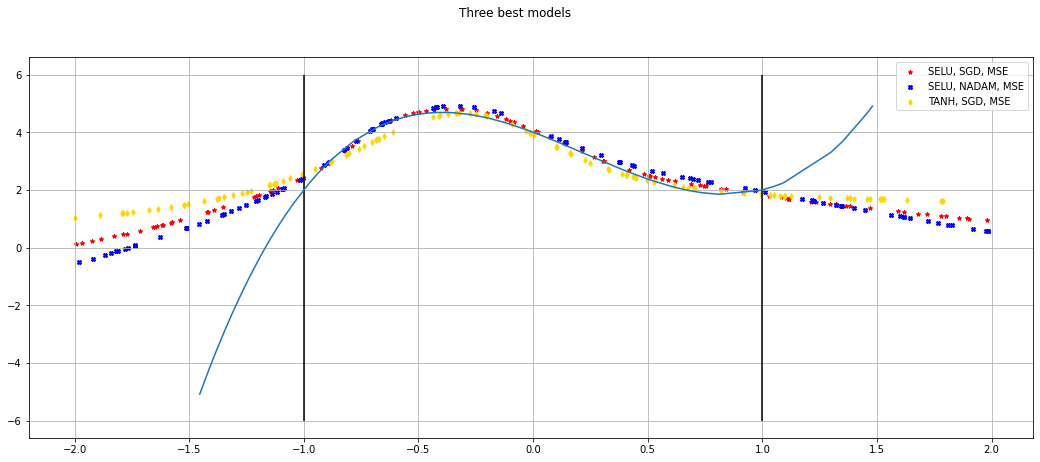

In [34]:
fig=plt.figure(figsize=(18,7))
fig.suptitle("Three best models")

x_predicted1 = np.random.uniform(-2, 2, 100)
y_predicted1 = model31.predict(x_predicted1)
plt.scatter(x_predicted1, y_predicted1, color='r', s=17, marker="*", label = "SELU, SGD, MSE")

x_predicted2 = np.random.uniform(-2, 2, 100)
y_predicted2 = model32.predict(x_predicted2)
plt.scatter(x_predicted2, y_predicted2,color='b', s=17, marker="X", label = "SELU, NADAM, MSE")


x_predicted3 = np.random.uniform(-2, 2, 100)
y_predicted3 = model33.predict(x_predicted3)
plt.scatter(x_predicted3, y_predicted3,color='gold', s=17, marker="d", label = "TANH, SGD, MSE")

x_valid2 = np.random.uniform(-1.5, 1.5, 100)
x_valid2.sort()
y_target2 = a + b * x_valid2 + c * x_valid2**2 + d * x_valid2**3

plt.vlines(-1, -6, 6, colors='k', linestyles='solid')
plt.vlines(1, -6, 6, colors='k', linestyles='solid')

plt.plot(x_valid2, y_target2)
plt.legend(loc="best")
plt.grid(True)
plt.show()


Below are the loss and accuracy results obtained: bolded are the three best results, which are plotted above. As one could expect, the best model is the one using the parameters which we used in the previous exercise, where we selected for the best architecture: this is an obvious bias, and one would need to test all the architectures for all of the parameters combination. This is one of the problems with trying to optimize all the parameters: adding the 5 architecture we chose above, which were completely arbitrary and one could think of infinitely more, to the parameters we're testing now (of which again there are many more) one would get **120** different combinations. 

The accuracy test was always performed with the metric MSE, and this was a disadvantage for the models which used MSLE as a loss function: the worst models were using this loss function. None of the models had any success in predicting the curve outside the training range $[-1,1]$

In the **Appendix** some of the results obtained in the search for the best combination of the three parameters are shown




## Exercise 11.3

The function to be modeled is a function $\mathbb{R}^2 \Rightarrow \mathbb{R}$, $f(x) = \sin(x^2 + y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$. First we will try with the best three models from above, then experiment to find the bvest combination of small layers and good results. The number of training points has been augmented given the function to model is more difficult and the space in which to model it is now $\mathbb{R}^2$ and not $\mathbb{R}$
 

In [35]:
# target parameters of f(x) = sin(x**2 + y**2)

In [46]:
import numpy as np

# generate training inputs
np.random.seed(2)
x_train = np.random.uniform(-3/2, 3/2, 5000)
y_train = np.random.uniform(-3/2, 3/2, 5000)
x_valid = np.random.uniform(-3/2, 3/2, 100)
y_valid = np.random.uniform(-3/2, 3/2, 100)
x_valid.sort()
y_valid.sort()
z_target = np.sin(x_valid**2 + y_valid**2) # ideal (target) function

sigma = 0.5 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(np.sin(x_train**2 + y_train**2) , sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

In [51]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model34 = tf.keras.Sequential()
model34.add(Dense(100, input_shape=(2,), activation='selu'))
model34.add(Dense(50, activation='selu'))
model34.add(Dense(20, activation='selu'))
model34.add(Dense(80, activation='selu'))
model34.add(Dense(1,))



model34.compile(optimizer='nadam', loss='mse', metrics=['mse'])

train=np.column_stack((x_train, y_train))
valid=np.column_stack((x_valid, y_valid))

history34 = model34.fit(x=train, y=z_train, batch_size=32, epochs=30, shuffle=True, validation_data=(valid, z_valid))


Epoch 1/30
157/157 [==============================] - 2s 5ms/step - loss: 0.3934 - mse: 0.3934 - val_loss: 0.5498 - val_mse: 0.5498
Epoch 2/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3546 - mse: 0.3546 - val_loss: 0.4711 - val_mse: 0.4711
Epoch 3/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3391 - mse: 0.3391 - val_loss: 0.4262 - val_mse: 0.4262
Epoch 4/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3210 - mse: 0.3210 - val_loss: 0.4219 - val_mse: 0.4219
Epoch 5/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3196 - mse: 0.3196 - val_loss: 0.4307 - val_mse: 0.4307
Epoch 6/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3048 - mse: 0.3048 - val_loss: 0.3676 - val_mse: 0.3676
Epoch 7/30
157/157 [==============================] - 0s 2ms/step - loss: 0.3048 - mse: 0.3048 - val_loss: 0.3464 - val_mse: 0.3464
Epoch 8/30
157/157 [==============================] - 0s 2ms/step - loss: 0.

Best Model
Test loss: 0.27789920568466187
Test accuracy: 0.27789920568466187


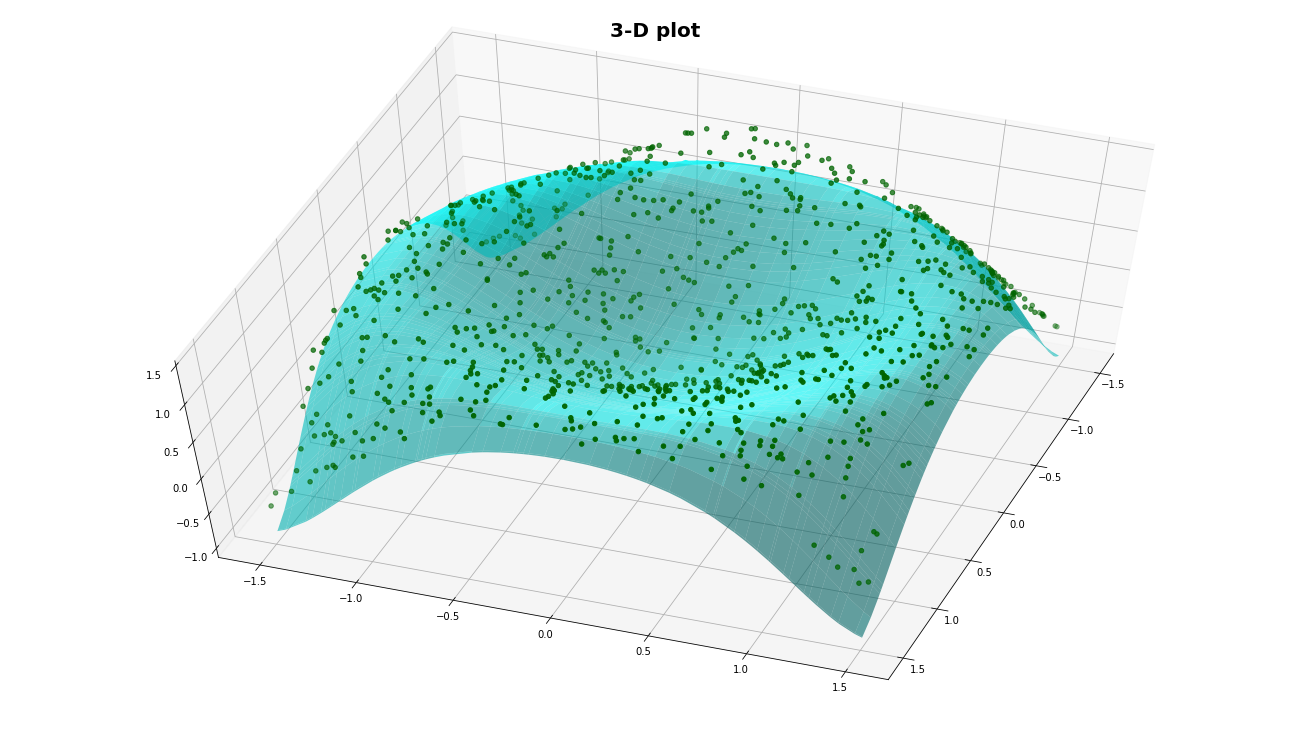

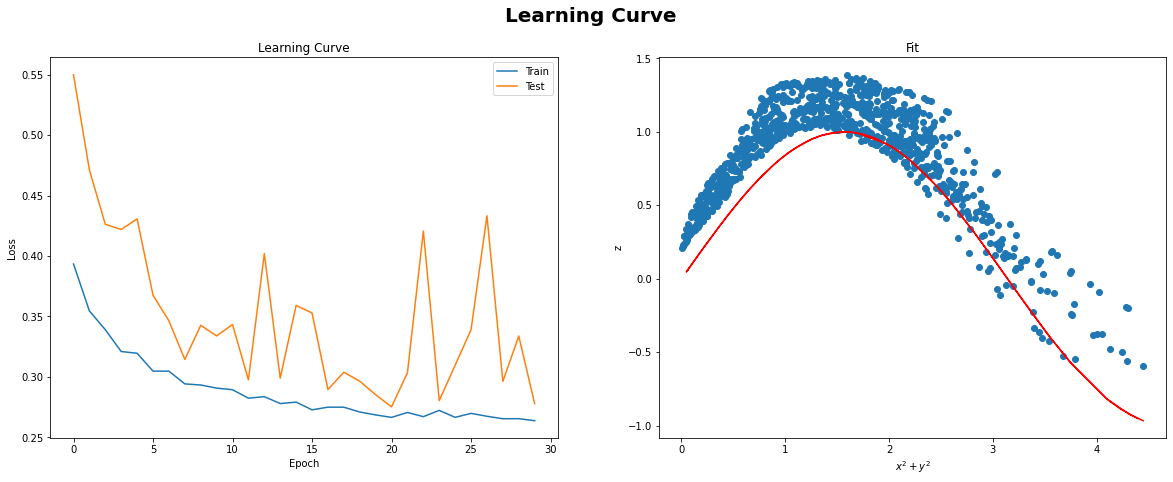

In [54]:
score = model34.evaluate(valid, z_valid, batch_size=100, verbose=0)
print('Best Model')
print('Test loss:', score[0])
print('Test accuracy:', score[1])


from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(18,10))
fig.suptitle('3-D plot', fontsize=20, fontweight="bold")

x_predicted = np.random.uniform(-3/2, 3/2, 1000)
y_predicted = np.random.uniform(-3/2, 3/2, 1000)
predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model34.predict(predicted)
ax = Axes3D(fig)
X, Y = np.meshgrid(x_valid, y_valid)
z_target = np.sin(X*X+Y*Y)
ax.scatter(x_predicted, y_predicted, z_predicted, color = 'darkgreen')
ax.plot_surface(X, Y, z_target, color = 'cyan', alpha = 0.6)
ax.view_init(60, 20)
plt.grid(True)

fig=plt.figure(figsize=(20,7))

fig.suptitle('Best Model', fontsize=20, fontweight="bold")

plt.subplot(121)
fig.suptitle('Learning Curve', fontsize=20, fontweight="bold")
plt.plot(history34.history['loss'])
plt.plot(history34.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(122)
z_target = np.sin(x_valid*x_valid+y_valid*y_valid) 
plt.plot(x_valid*x_valid+y_valid*y_valid, z_target, color='red')
plt.scatter(x_predicted*x_predicted+y_predicted*y_predicted, z_predicted)
plt.title('Fit')
plt.ylabel('z')
plt.xlabel('$x^2+y^2$')


plt.show()

The fitting started from the three best models obtained in the previous section: of these the first two (SELU, SGD, MSE and SELU, NADAM, MSE) were clearly better, so they were taken as starting point for the other models. Then some nodes were added to the layers, in different fashions, and some of the various results are reported below. Lastly, startin from the better one of those configurations another layer and some nodes were added, managing to improve tha accuracy slightly more. The best result accuracy-wise is the one shown above, which corresponds to a structure of 100-50-20-80 nodes using SELU as the activation function, NADAM as the optimization and MSE as the loss function. 

It's important to note that the accuracy of the model depends on the single run of the code, and it can change significantly: for example, four consectuive runs of the same model gave the following results:

Accuracy: 0.2583986520767212

Accuracy: 0.26836350560188293

Accuracy: 0.2846875488758087

Accuracy: 0.2763230800628662

So it seems that many of the models shown below are effectively the same in terms of efficiency: the best one then is the simpler one, which requires less nodes and layers to achieve the same result. That would be the one with structure 45-20-45 with SELU as the activation function, NADAM as the optimization and MSE as the loss function. 



#**Appendix**

##Some results from the search of the best activation function,optimizater and loss function combination from 11.2. The three bolded ones are the best ones found

-------------------------------------------------------------------
-------------------------------------------------------------------
-------------------------------------------------------------------

**SELU with sgd, mse**

**Test loss: 0.017626343294978142
Test accuracy: 0.017626343294978142**

-------------------------------------------------------------------

ELU with sgd, mse

Test loss: 0.040571071207523346
Test accuracy: 0.040571071207523346

-------------------------------------------------------------------


**TANH with sgd, mse**

**Test loss: 0.031791821122169495
Test accuracy: 0.031791821122169495**

-------------------------------------------------------------------

SIGMOID with sgd, mse

Test loss: 0.9979066252708435
Test accuracy: 0.9979066252708435

-------------------------------------------------------------------

SELU with adagrad, mse

Test loss: 0.7038938403129578
Test accuracy: 0.7038938403129578

-------------------------------------------------------------------

ELU with adagrad, mse

Test loss: 0.6786765456199646
Test accuracy: 0.6786765456199646

-------------------------------------------------------------------

TANH with adagrad, mse

Test loss: 0.603395402431488
Test accuracy: 0.603395402431488

-------------------------------------------------------------------

SIGMOID with adagrad, mse

Test loss: 1.0294262170791626
Test accuracy: 1.0294262170791626

-------------------------------------------------------------------

**SELU with nadam, mse**

**Test loss: 0.02260100096464157
Test accuracy: 0.02260100096464157**

-------------------------------------------------------------------

ELU with nadam, mse

Test loss: 0.038392573595047
Test accuracy: 0.038392573595047

-------------------------------------------------------------------

TANH with nadam, mse

Test loss: 0.07860898226499557
Test accuracy: 0.07860898226499557

-------------------------------------------------------------------

SIGMOID with nadam, mse

Test loss: 0.5384753346443176
Test accuracy: 0.5384753346443176

-------------------------------------------------------------------

SELU with nadam, msle

Test loss: 0.0025636390782892704
Test accuracy: 0.03569735214114189

-------------------------------------------------------------------

ELU with nadam, msle

Test loss: 0.010367358103394508
Test accuracy: 0.15207596123218536

-------------------------------------------------------------------

TANH with nadam, msle

Test loss: 0.005871491506695747
Test accuracy: 0.1064709946513176

-------------------------------------------------------------------

SIGMOID with nadam, msle

Test loss: 0.03410131484270096
Test accuracy: 0.6065276861190796

-------------------------------------------------------------------

SELU with adagrad, msle

Test loss: 0.036759618669748306
Test accuracy: 0.7187307476997375

-------------------------------------------------------------------

ELU with adagrad, msle

Test loss: 0.14274300634860992
Test accuracy: 2.2498857975006104

-------------------------------------------------------------------

TANH with adagrad, msle

Test loss: 0.10457630455493927
Test accuracy: 1.7765002250671387

-------------------------------------------------------------------

SIGMOID with adagrad, msle

Test loss: 2.0510480403900146
Test accuracy: 13.909130096435547

-------------------------------------------------------------------

SELU with sgd, msle

Test loss: 0.03037974052131176
Test accuracy: 0.579957902431488

-------------------------------------------------------------------

ELU with sgd, msle

Test loss: 0.03702704980969429
Test accuracy: 0.7296810150146484

-------------------------------------------------------------------

TANH with sgd, msle

Test loss: 0.03230142965912819
Test accuracy: 0.6183829307556152

-------------------------------------------------------------------

SIGMOID with sgd, msle

Test loss: 0.06035280600190163
Test accuracy: 1.007851004600525

-------------------------------------------------------------------
-------------------------------------------------------------------
-------------------------------------------------------------------
-------------------------------------------------------------------
-------------------------------------------------------------------
-------------------------------------------------------------------


##Here are some of the results obtained whilst searching for the optimal model in 11.3, categorized by theier geometry and optimizer

-------------------------------------------------------------------

#### Model #1 of the best three (SELU, SGD, MSE)

Test loss: 0.30550113320350647
Test accuracy: 0.30550113320350647

-------------------------------------------------------------------


####Model #2 of the best three (SELU, NADAM, MSE)

Test loss: 0.28376564383506775
Test accuracy: 0.28376564383506775

-------------------------------------------------------------------

####Model #3 of the best three (TANH, SGD, MSE)

Test loss: 0.598232090473175
Test accuracy: 0.598232090473175

-------------------------------------------------------------------
-------------------------------------------------------------------

###Adding nodes to the layers 

-------------------------------------------------------------------
-------------------------------------------------------------------

####SGD 60-30-60
Test loss: 0.30317458510398865
Test accuracy: 0.30317458510398865

-------------------------------------------------------------------

####SGD 80-20-80
Test loss: 0.3689403533935547
Test accuracy: 0.3689403533935547

-------------------------------------------------------------------

####NADAM 60-30-60
Test loss: 0.4293220639228821
Test accuracy: 0.4293220639228821

-------------------------------------------------------------------

####NADAM 80-20-80
Test loss: 0.2719881534576416
Test accuracy: 0.2719881534576416

-------------------------------------------------------------------
-------------------------------------------------------------------


###Adding a layer 

-------------------------------------------------------------------
-------------------------------------------------------------------

####NADAM 100-50-20-80
Test loss: 0.2583986520767212
Test accuracy: 0.2583986520767212

-------------------------------------------------------------------


####NADAM 100-50-50-80
Test loss: 0.259539395570755
Test accuracy: 0.259539395570755